In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.preprocessing import LabelEncoder

import os
import cv2

load Dataset

In [3]:
dataset = np.load('custom_mnist.npz')
x_train = dataset['x_train']
y_train = dataset['y_train']
x_test = dataset['x_test']
y_test = dataset['y_test']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(61484, 28, 28) (61484,)
(12405, 28, 28) (12405,)


In [9]:


#Normailize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0   

#neural network model

inputs = Input((28,28))
x = Flatten()(inputs)

x = Dense(256 ,activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
X = Dense(32, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile (optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    x_train , y_train , 
    epochs = 250 , 
    batch_size = 32 ,
      validation_data = (x_test , y_test)
)

Epoch 1/100
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8728 - loss: 0.4159 - val_accuracy: 0.8697 - val_loss: 0.4310
Epoch 2/100
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9660 - loss: 0.1100 - val_accuracy: 0.8807 - val_loss: 0.3801
Epoch 3/100
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9757 - loss: 0.0753 - val_accuracy: 0.8870 - val_loss: 0.3636
Epoch 4/100
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9809 - loss: 0.0588 - val_accuracy: 0.8913 - val_loss: 0.3685
Epoch 5/100
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9834 - loss: 0.0500 - val_accuracy: 0.8888 - val_loss: 0.3926
Epoch 6/100
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9863 - loss: 0.0411 - val_accuracy: 0.8922 - val_loss: 0.3834
Epoch 7/100
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9877 - loss: 0.0365 - val_accuracy: 0.8948 - val_loss: 0.4047
Epoch 8/100
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9895 - loss: 0

In [6]:
#accuracy

y_pred = model.predict(x_test).argmax(axis=1)

# Accuracy
acc = (y_pred == y_test).mean()
print("Test Accuracy:", acc)


388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.8976219266424829


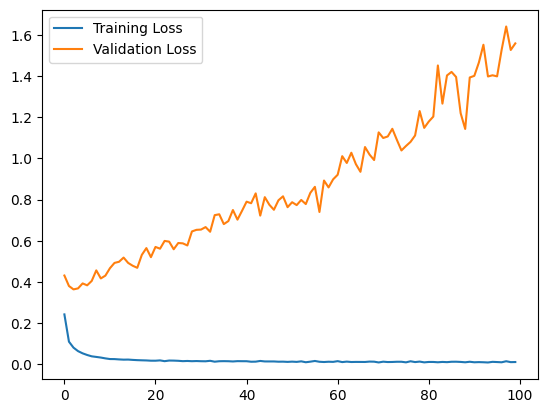

In [7]:
plt.figure()
plt.plot(history.history['loss'], label = "Training Loss")
plt.plot(history.history['val_loss'] , label = "Validation Loss")
plt.legend()
plt.show()


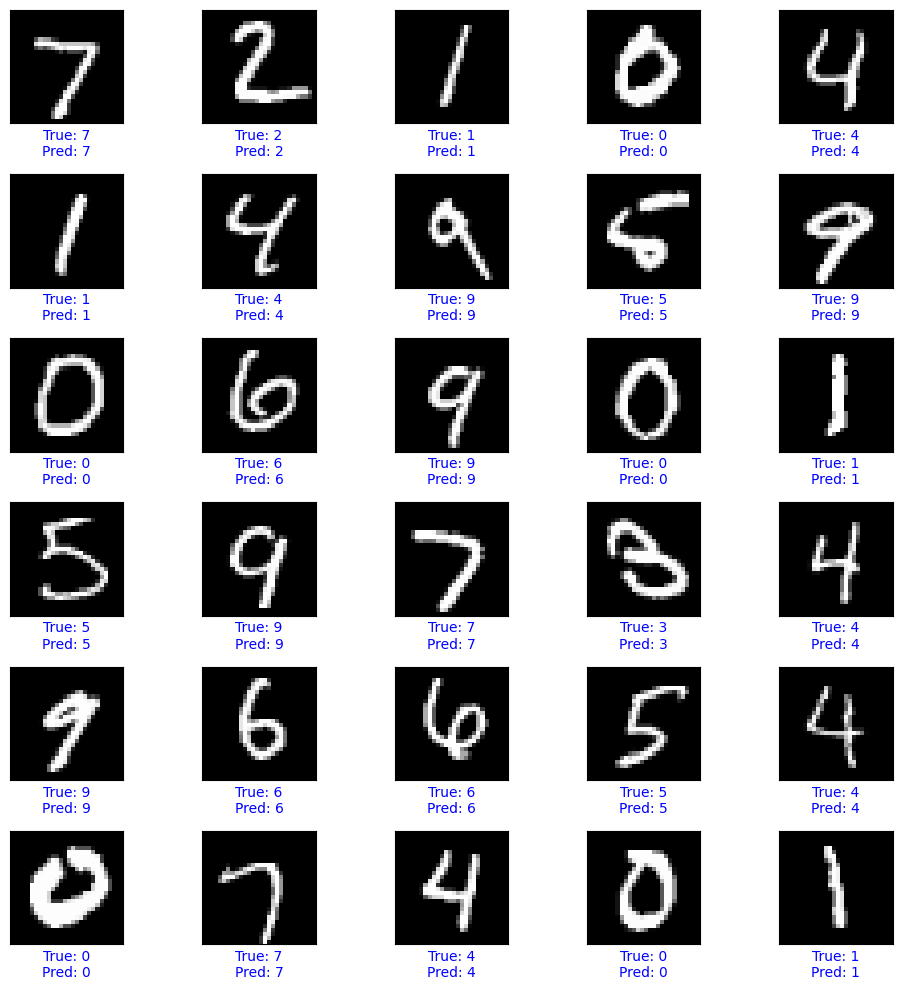

In [8]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap="gray")
    
    # True ও Predicted label দেখানো
    plt.xlabel(f"True: {y_test[i]}\nPred: {y_pred[i]}", color="blue")
plt.tight_layout()
plt.show()
